In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('../scripts')
from utils import split_annotations
os.chdir('../experiments')

In [3]:
annotations_path = Path('../data/annotations/annotations.xlsx')
target_dir_path = Path('../data/annotations/splits/two/10_20/')

In [4]:
# Split the original annotations file into train and validation annotations files
# val_ratio = 0.2 (value by default)
split_annotations(annotations_path, target_dir_path, test_split=False)

# Read the previous three created .xlsx files into dataframes
train_df = pd.read_excel(target_dir_path / 'train_annotations.xlsx')
val_df = pd.read_excel(target_dir_path / 'val_annotations.xlsx')

len(train_df), len(val_df)

(2800, 700)

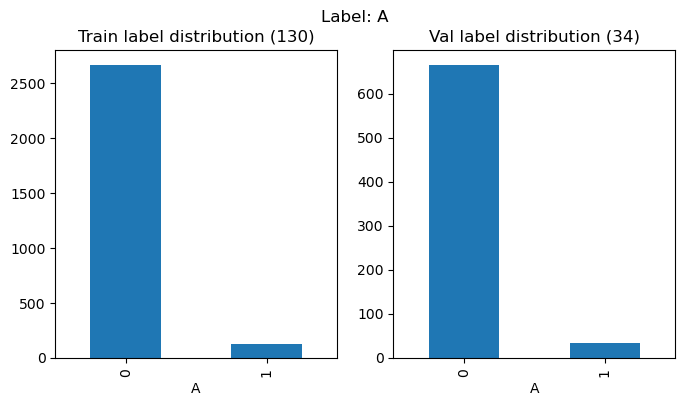

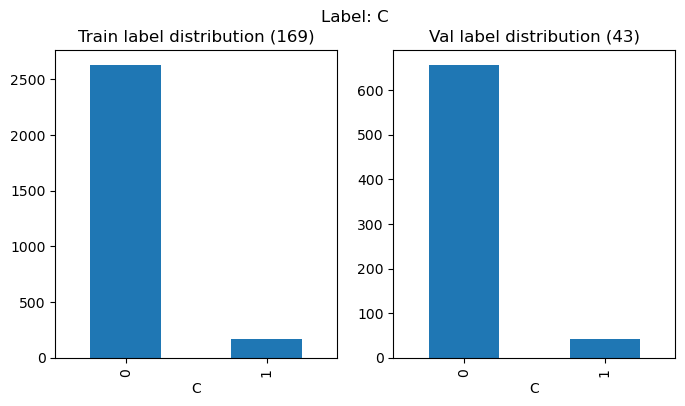

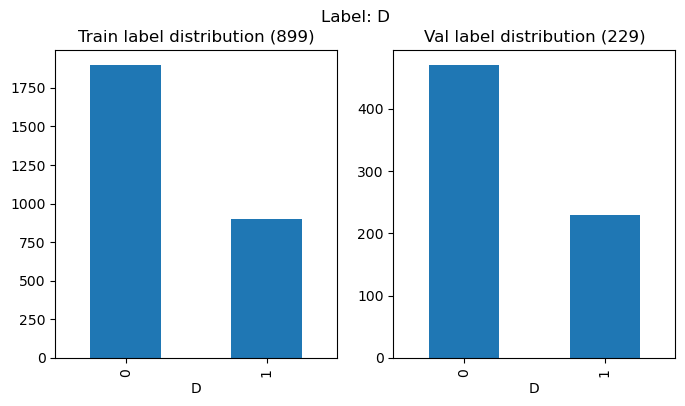

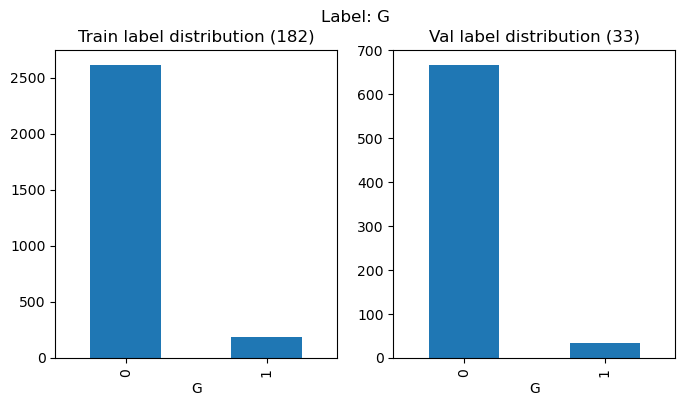

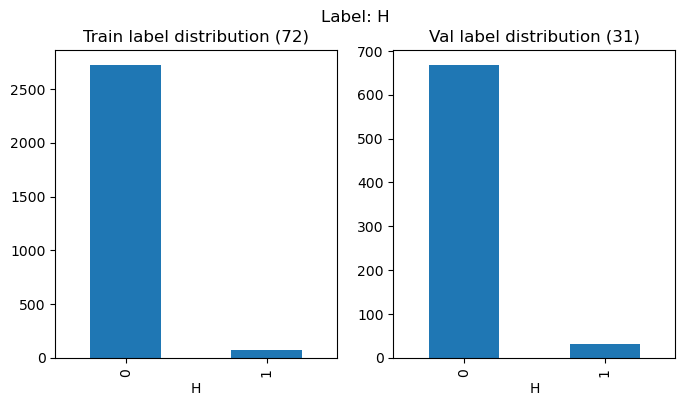

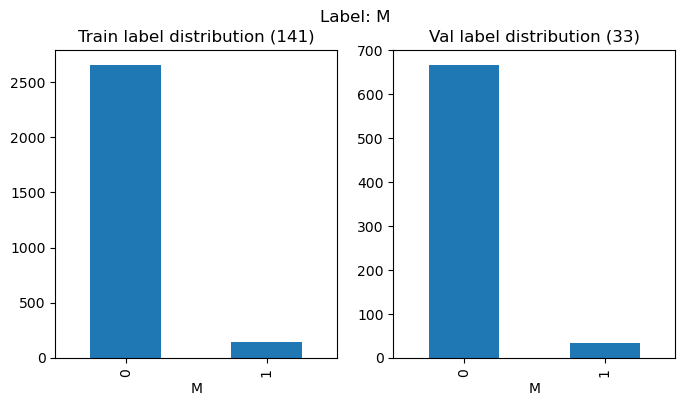

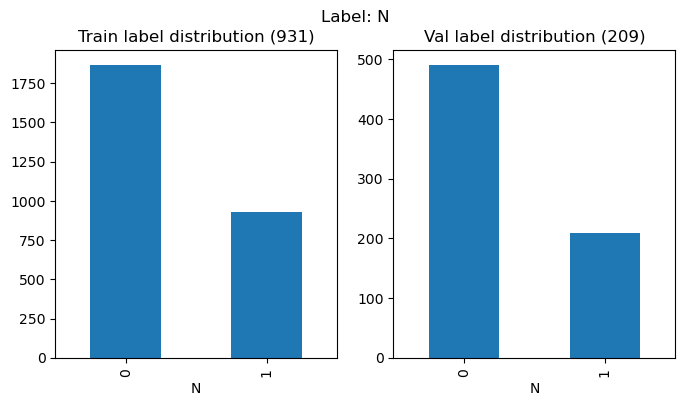

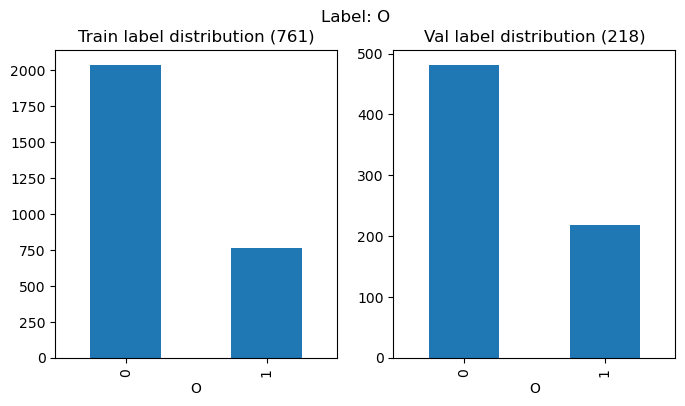

In [8]:
label_names = ['A','C','D','G','H','M','N','O']

for i, label in enumerate(label_names):
    plt.figure(figsize=(8,4))
    
    total_label_train = int(train_df.loc[:, [label]].sum())
    total_label_val = int(val_df.loc[:, [label]].sum())
    
    plt.subplot(1,2,1)
    train_df.pivot_table(index=label, aggfunc='size').plot(kind='bar', title = f'Train label distribution ({total_label_train})')
    plt.subplot(1,2,2)
    val_df.pivot_table(index=label, aggfunc='size').plot(kind='bar', title = f'Val label distribution ({total_label_val})')
    
    plt.suptitle(f'Label: {label}')